In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import json
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
data = pd.read_excel('PFOSdist.xlsx', sheet_name='全球浓度分布')
data.head()

,No.,Country,period,Sample size,Exposure setting,PFOS Concentration (ng/mL),PFOA Concentration (ng/mL),reference,Lon_lat
0,1,"China, guangdong",2016,202.0,general,2.01,1.78,Perﬂuorinated alkyl substances in serum of the...,"23.157620, 113.189766"
1,2,U.S,2016,NaN,general,4.24,1.51,NaN,"40.638361, -97.843210"
2,3,U.K,2015,59.0,general,3.46,2.39,Perfluorinated alkyl acids in the serum and fo...,"53.460321, -2.213886"
3,4,Korea,2015,786.0,general,12.39,5.30,Influence of exposure to perfluoroalkyl substa...,"36.366657, 127.845881"
4,5,"China, shanghai",2012,981.0,general,19.97,10.81,Determinants of plasma concentrations of perfl...,"31.116925, 121.446254"


In [4]:
data = data.iloc[:, [1,5,6,8]]
data.head()

,Country,PFOS Concentration (ng/mL),PFOA Concentration (ng/mL),Lon_lat
0,"China, guangdong",2.01,1.78,"23.157620, 113.189766"
1,U.S,4.24,1.51,"40.638361, -97.843210"
2,U.K,3.46,2.39,"53.460321, -2.213886"
3,Korea,12.39,5.30,"36.366657, 127.845881"
4,"China, shanghai",19.97,10.81,"31.116925, 121.446254"


In [5]:
def deal_lon_lat(row):
    lon_lat = row[-1]
    lat, lon = lon_lat.split(', ')
    return float(lon), float(lat)

In [6]:
data['lon'], data['lat'] = data.apply(deal_lon_lat, axis=1).str
data.head()

,Country,PFOS Concentration (ng/mL),PFOA Concentration (ng/mL),Lon_lat,lon,lat
0,"China, guangdong",2.01,1.78,"23.157620, 113.189766",113.189766,23.157620
1,U.S,4.24,1.51,"40.638361, -97.843210",-97.843210,40.638361
2,U.K,3.46,2.39,"53.460321, -2.213886",-2.213886,53.460321
3,Korea,12.39,5.30,"36.366657, 127.845881",127.845881,36.366657
4,"China, shanghai",19.97,10.81,"31.116925, 121.446254",121.446254,31.116925


In [7]:
def get_xy(row):
    return m(row[-2], row[-1])

In [8]:
data.head()

,Country,PFOS Concentration (ng/mL),PFOA Concentration (ng/mL),Lon_lat,lon,lat
0,"China, guangdong",2.01,1.78,"23.157620, 113.189766",113.189766,23.157620
1,U.S,4.24,1.51,"40.638361, -97.843210",-97.843210,40.638361
2,U.K,3.46,2.39,"53.460321, -2.213886",-2.213886,53.460321
3,Korea,12.39,5.30,"36.366657, 127.845881",127.845881,36.366657
4,"China, shanghai",19.97,10.81,"31.116925, 121.446254",121.446254,31.116925


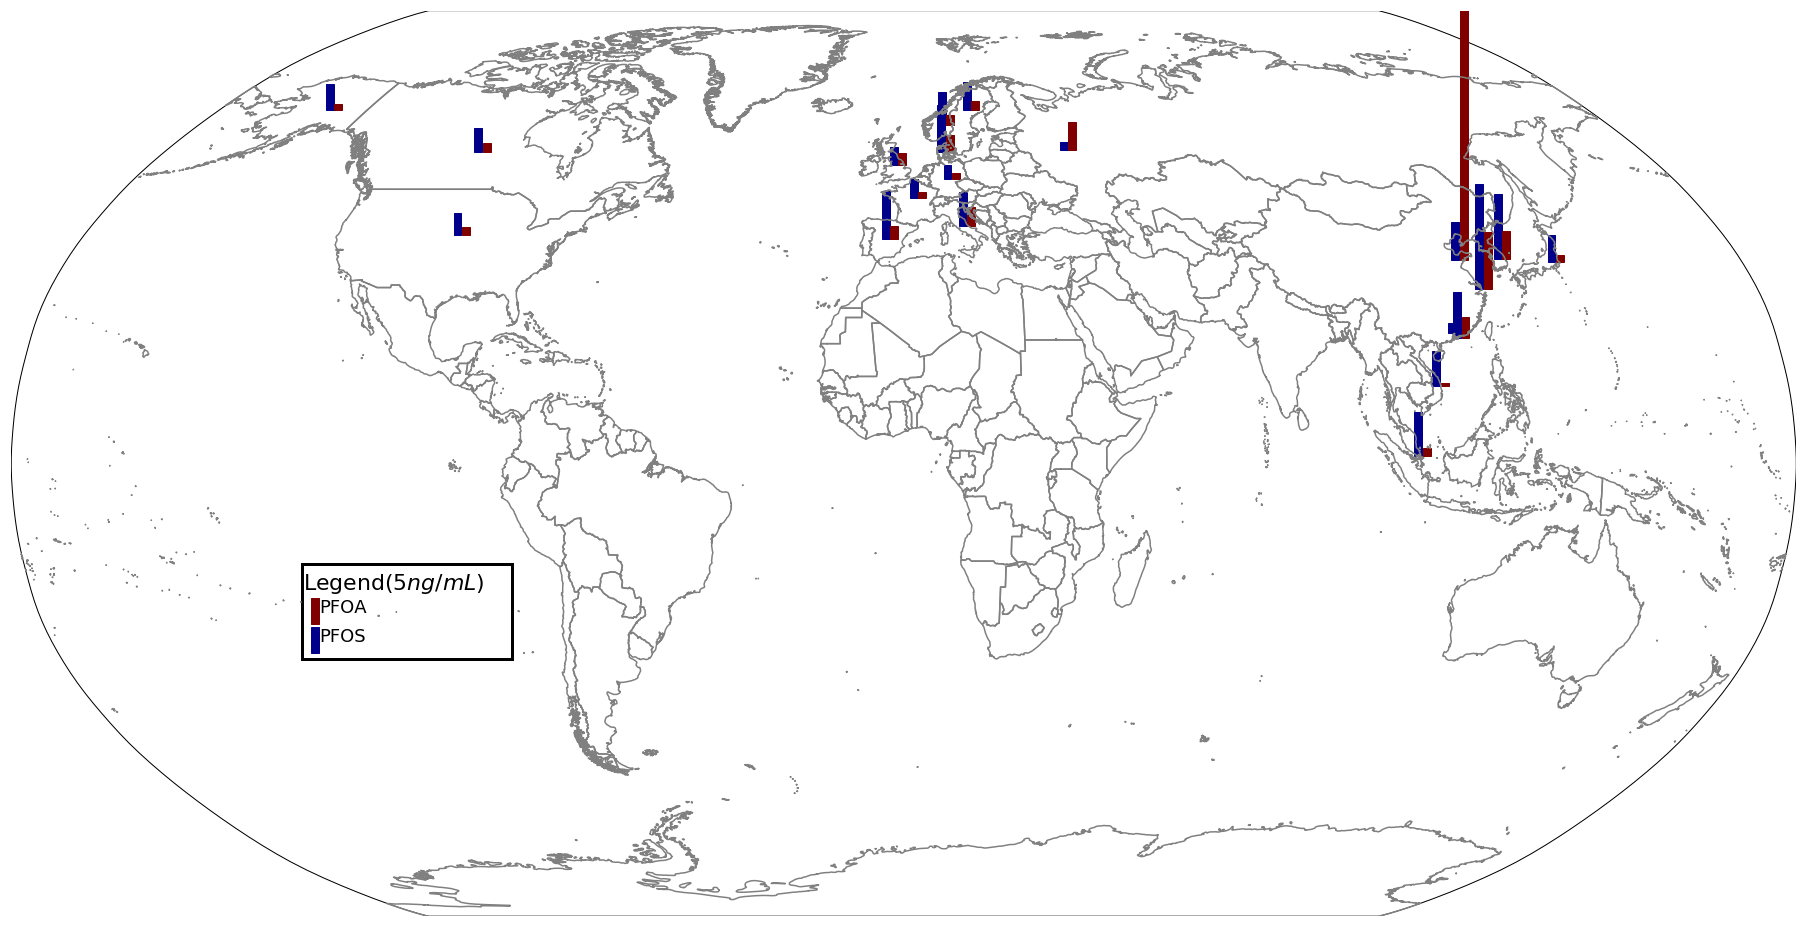

In [18]:
fig = plt.figure(figsize=(32, 18))
ax = fig.add_subplot(111)
m = Basemap(
        projection='robin', 
        lon_0=0,
        resolution='h', ax=ax
)

shp_info =m.readshapefile('world_shape/TM_WORLD_BORDERS', 'scalerank', drawbounds=False)

m.drawcoastlines(color='white', zorder=0)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.drawmapboundary(fill_color='white', linewidth=0)

for info, shp in zip(m.scalerank_info, m.scalerank):
    poly = Polygon(shp, facecolor='white', edgecolor='w', alpha=.1)
    line_x, line_y = list(zip(*shp))
    line = Line2D(line_x, line_y, c='grey', alpha=1)
    ax.add_patch(poly)
    ax.add_line(line)

x, y = data.apply(get_xy, axis=1).str

for row in data.iterrows():
    index = row[0]
    cont = row[1]
    x0 = x[index]
    y0 = y[index]
    conc_s = cont['PFOS Concentration (ng/mL)']*1e5
    conc_a = cont['PFOA Concentration (ng/mL)']*1e5
    rect1 = Rectangle((x0-80000, y0), width=150000, height=conc_s, color='darkblue')
    rect2 = Rectangle((x0+80000, y0), width=150000, height=conc_a, color='maroon')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    
x_, y_ = m(-130.568809, -33.811123)

rect_s = Rectangle((x_+400000, y_), width=150000, height=5e5, color='darkblue')
rect_o = Rectangle((x_+400000, y_+5.5e5), width=150000, height=5e5, color='maroon')
ax.text(x_+550000, y_+2.2e5, 'PFOS', fontsize=18)
ax.text(x_+550000, y_+2.2e5+5.5e5, 'PFOA', fontsize=18)
ax.text(x_+250000, y_+12e5, 'Legend$(5ng/mL)$', fontsize=22)
ax.add_patch(rect_s)
ax.add_patch(rect_o)
rect_big = Rectangle((x_+220000, y_-100000), width=4e6, height=1.8e6, fill=False, edgecolor='k', linewidth=3)
ax.add_patch(rect_big)
fig.savefig('world.png')

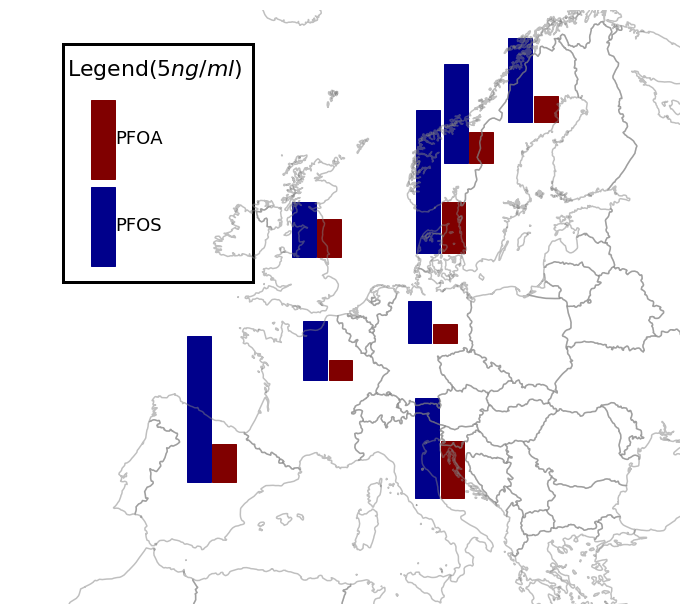

In [81]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-13.289415, llcrnrlat=30.412531, 
        urcrnrlon=40.960830, urcrnrlat=70.076332, 
        projection='cass', 
        lon_0=25.654919, lat_0=49.433718,
        resolution='h', ax=ax
)
shp_info =m.readshapefile('world_shape/TM_WORLD_BORDERS', 'scalerank', drawbounds=False)

m.drawcoastlines(color='white', zorder=0)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.drawmapboundary(fill_color='white', linewidth=0)

for info, shp in zip(m.scalerank_info, m.scalerank):
    poly = Polygon(shp, facecolor='white', edgecolor='w', alpha=0.1)
    line_x, line_y = list(zip(*shp))
    line = Line2D(line_x, line_y, c='grey', alpha=.5)
    ax.add_patch(poly)
    ax.add_line(line)

x, y = data.apply(get_xy, axis=1).str

for row in data.iterrows():
    index = row[0]
    cont = row[1]
    x0 = x[index]
    y0 = y[index]
    conc_s = cont['PFOS Concentration (ng/mL)']*1e5
    conc_a = cont['PFOA Concentration (ng/mL)']*1e5
    rect1 = Rectangle((x0-80000, y0), width=150000, height=conc_s, color='darkblue')
    rect2 = Rectangle((x0+80000, y0), width=150000, height=conc_a, color='maroon')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    
x_, y_ = m(-22.543006, 44.915036)


rect_s = Rectangle((x_+400000, y_), width=150000, height=5e5, color='darkblue')
rect_o = Rectangle((x_+400000, y_+5.5e5), width=150000, height=5e5, color='maroon')
ax.text(x_+550000, y_+2.2e5, 'PFOS', fontsize=18)
ax.text(x_+550000, y_+2.2e5+5.5e5, 'PFOA', fontsize=18)
ax.text(x_+250000, y_+12e5, 'Legend$(5ng/ml)$', fontsize=22)
ax.add_patch(rect_s)
ax.add_patch(rect_o)
rect_big = Rectangle((x_+220000, y_-100000), width=1.2e6, height=1.5e6, fill=False, edgecolor='k', linewidth=3)
ax.add_patch(rect_big)
fig.savefig('we.png')

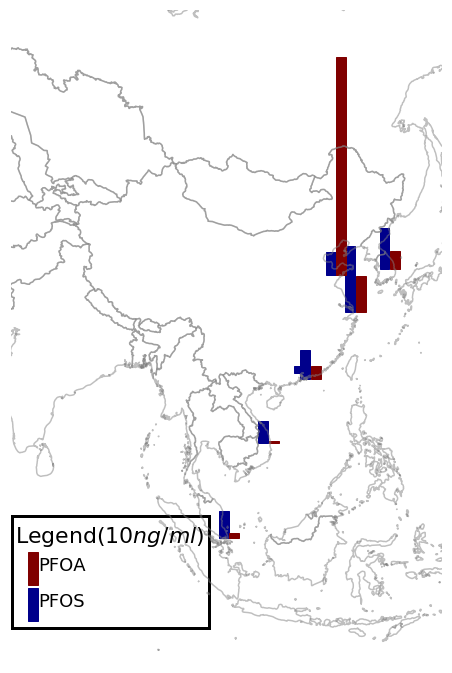

In [82]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=80.766964, llcrnrlat=-15, 
        urcrnrlon=159.903352, urcrnrlat=65.156020, 
        projection='stere', 
        lon_0=112.716307, lat_0=36.737808,
        resolution='h', ax=ax
)
shp_info =m.readshapefile('world_shape/TM_WORLD_BORDERS', 'scalerank', drawbounds=False)

m.drawcoastlines(color='white', zorder=0)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.drawmapboundary(fill_color='white', linewidth=0)

for info, shp in zip(m.scalerank_info, m.scalerank):
    poly = Polygon(shp, facecolor='white', edgecolor='w', alpha=0.1)
    line_x, line_y = list(zip(*shp))
    line = Line2D(line_x, line_y, c='grey', alpha=.5)
    ax.add_patch(poly)
    ax.add_line(line)

x, y = data.apply(get_xy, axis=1).str

pivot = True
for row in data.iterrows():
    index = row[0]
    cont = row[1]
    x0 = x[index]
    y0 = y[index]
    conc_s = cont['PFOS Concentration (ng/mL)']*.5e5
    conc_a = cont['PFOA Concentration (ng/mL)']*.5e5
    if pivot:
        rect1 = Rectangle((x0-80000, y0), width=150000, height=conc_s, color='darkblue', label='PFOS')
        rect2 = Rectangle((x0+80000, y0), width=150000, height=conc_a, color='maroon', label='PFOA')
        pivot = False
    else:
        rect1 = Rectangle((x0-80000, y0), width=150000, height=conc_s, color='darkblue')
        rect2 = Rectangle((x0+80000, y0), width=150000, height=conc_a, color='maroon')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    
x_, y_ = m(80.326747, -10.718236)

rect_s = Rectangle((x_+250000, y_), width=150000, height=5e5, color='darkblue')
rect_o = Rectangle((x_+250000, y_+5.5e5), width=150000, height=5e5, color='maroon')
ax.text(x_+400000, y_+2.2e5, 'PFOS', fontsize=18)
ax.text(x_+400000, y_+2.2e5+5.5e5, 'PFOA', fontsize=18)
ax.text(x_+50000, y_+12e5, 'Legend$(10ng/ml)$', fontsize=22)
ax.add_patch(rect_s)
ax.add_patch(rect_o)
rect_big = Rectangle((x_, y_-100000), width=3e6, height=1.7e6, fill=False, edgecolor='k', linewidth=3)
ax.add_patch(rect_big)
#plt.legend()

fig.savefig('EA.png')

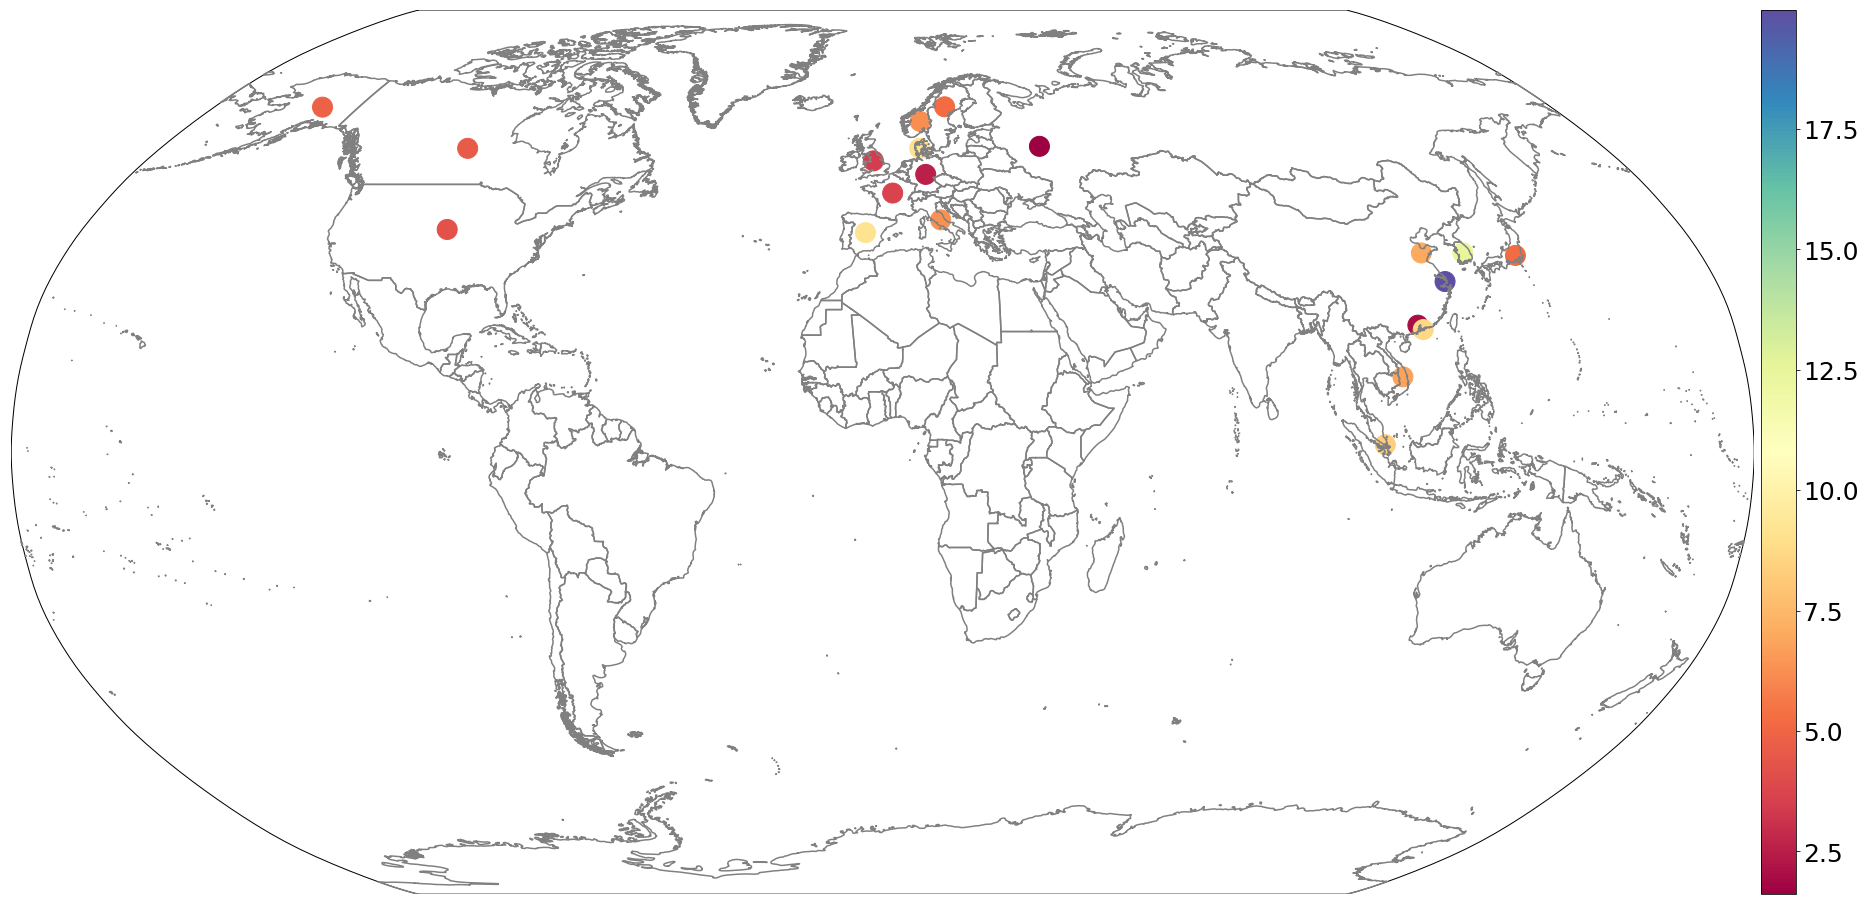

In [68]:
fig = plt.figure(figsize=(32, 18))
ax = fig.add_subplot(111)
m = Basemap(projection='robin', lon_0=0, resolution='l',ax=ax)

shp_info =m.readshapefile('world_shape/TM_WORLD_BORDERS', 'scalerank', drawbounds=False)
m.drawcoastlines(color='white', zorder=0,)
m.drawmapboundary(fill_color='None', linewidth=0)

for info, shp in zip(m.scalerank_info, m.scalerank):
    poly = Polygon(shp, facecolor='white', edgecolor='w', alpha=0)
    line_x, line_y = list(zip(*shp))
    line = Line2D(line_x, line_y, c='grey',alpha=1)
    ax.add_patch(poly)
    ax.add_line(line)
    
x, y = data.apply(get_xy, axis=1).str
scatter = plt.scatter(x, y, s=400, c=data.iloc[:, 1])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cb = plt.colorbar(scatter, cax=cax)
cb.ax.tick_params(labelsize=25)

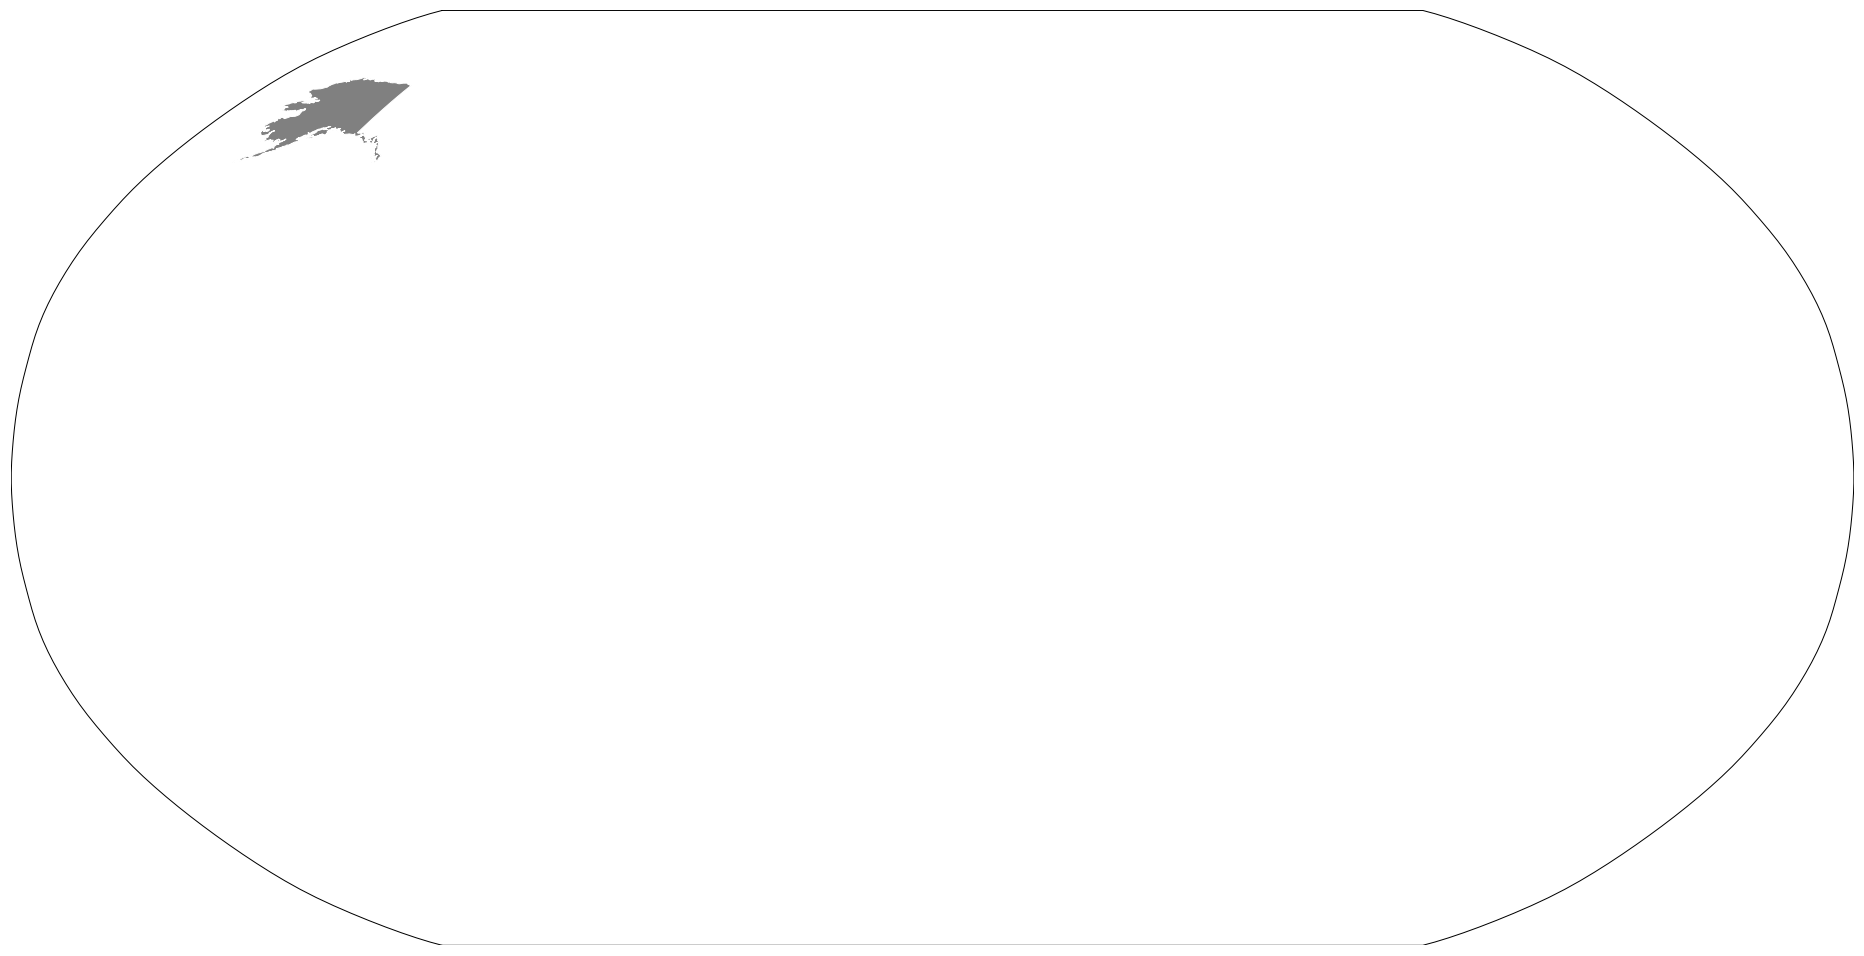

In [63]:
fig = plt.figure(figsize=(32, 18))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(projection='robin', lon_0=0, resolution='l',ax=ax)
shp_info =m.readshapefile('world_shape/TM_WORLD_BORDERS', 'scalerank', drawbounds=False)
#m.fillcontinents(color='gray',lake_color='white')
#m.drawcoastlines()
m.drawcoastlines(color='white', zorder=0)
m.drawmapboundary(fill_color='white', linewidth=0)


for data in us.sort_values(by='ring_len', ascending=False).iterrows():
    poly = Polygon(m.scalerank[data[0]], facecolor='grey', edgecolor='w')
    ax.add_patch(poly)
    break
plt.show()

In [13]:
regions = pd.DataFrame(m.scalerank_info)

In [14]:
regions.head()

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,RINGNUM,SHAPENUM,SUBREGION,UN
0,44,AC,AG,ATG,17.078,-61.783,Antigua and Barbuda,83039,19,1,1,29,28
1,44,AC,AG,ATG,17.078,-61.783,Antigua and Barbuda,83039,19,2,1,29,28
2,238174,AG,DZ,DZA,28.163,2.632,Algeria,32854159,2,1,2,15,12
3,8260,AJ,AZ,AZE,40.430,47.395,Azerbaijan,8352021,142,1,3,145,31
4,8260,AJ,AZ,AZE,40.430,47.395,Azerbaijan,8352021,142,2,3,145,31


In [19]:
us = regions[regions['ISO2'] == 'US']

In [49]:
us_rings = m.scalerank[us.index[0]:us.index[-1]+1]

In [59]:
ring_lens = []
for ring in us_rings:
    ring_lens.append(len(ring))
    
us['ring_len'] = ring_lens

C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
